In [15]:
#load libraries 
import numpy as np
import scipy.sparse as sp
import cplex as cp

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  7  7  8  8  9  9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17
 18 18 18 18 18 18 19 19 19 19 19 19 20 20 20 20 20 20 21 21 21 21 21 21]
[ 0  6 12 18  1  7 13 19  2  8 14 20  3  9 15 21  4 10 16 22  5 11 17 23
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


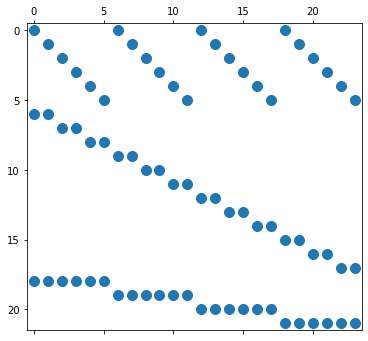

In [16]:
c = np.repeat(1, 24)
print(c)
senses = np.concatenate((np.repeat("E", 6), np.repeat("L", 12), np.repeat("G", 4)))
b = np.concatenate((np.repeat(1, 6),np.repeat(1, 12), np.repeat(1, 4)))
l = np.repeat(0, 24)
u = np.repeat(1, 24)
types = np.repeat("B", 24)

A = np.zeros((22,24))

aij = np.repeat(1, 72)
row = np.concatenate((np.repeat(range(6), 4),(6 + np.repeat(range(12), 2)), 18 + np.repeat(range(4), 6)))
col = np.concatenate((np.reshape(np.array(range(6*4)).reshape((4, 6)), newshape = (4*6, ), order = "F"), np.array(range(24)), np.array(range(24)) ))
print(row)
print(col)

A = sp.csr_matrix((aij, (row, col)), shape = (22, 24))

import matplotlib.pyplot as plt
plt.figure(figsize = (6, 9))
plt.spy(A, marker = "o")
plt.show()

In [12]:
x_star, obj_star = linear_programming("minimize", A, senses, b, c, l, u)

print(x_star)
print(obj_star)
print(np.array(x_star).reshape(4,6))

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced LP has 22 rows, 24 columns, and 72 nonzeros.
Presolve time = 0.00 sec. (0.02 ticks)
Symmetry aggregator did 42 additional substitutions.

Iteration log . . .
Iteration:     1   Dual objective     =             6.000000

Dual crossover.
  Dual:  Fixed no variables.
  Primal:  Fixing 18 variables.
       17 PMoves:  Infeasibility  0.00000000e+00  Objective  6.00000000e+00
        0 PMoves:  Infeasibility  0.00000000e+00  Objective  6.00000000e+00
  Primal:  Pushed 13, exchanged 5.
1
optimal
[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
6.0
[[1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
